<a href="https://colab.research.google.com/github/anjelica0224/MLPR/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


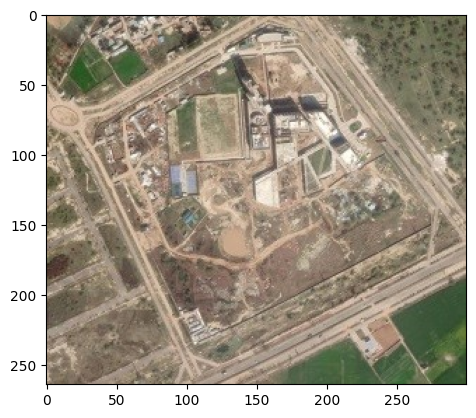

In [ ]:
image= cv2.imread('/content/sat_image_plaksha.jpg')
image_to_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixels = np.array(image_to_rgb)
plt.imshow(pixels)


array([[162, 169, 167, ..., 109, 112, 110],
       [168, 169, 164, ..., 106, 107, 104],
       [160, 176, 171, ..., 109, 113, 113],
       ...,
       [191, 196, 159, ...,  74,  73,  70],
       [136, 147, 130, ...,  74,  72,  72],
       [136, 140, 133, ...,  71,  67,  67]], dtype=uint8)
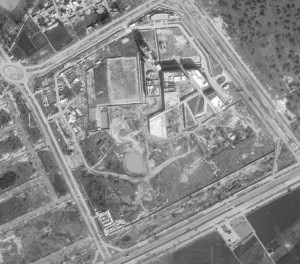

In [ ]:
gray = cv2.cvtColor(pixels, cv2.COLOR_RGB2GRAY )
pixels_gray = np.array(gray)
pixels_gray

In [ ]:
image_double = pixels_gray.astype(np.float64)
image_double

array([[162., 169., 167., ..., 109., 112., 110.],
       [168., 169., 164., ..., 106., 107., 104.],
       [160., 176., 171., ..., 109., 113., 113.],
       ...,
       [191., 196., 159., ...,  74.,  73.,  70.],
       [136., 147., 130., ...,  74.,  72.,  72.],
       [136., 140., 133., ...,  71.,  67.,  67.]])

In [ ]:
mean_column = np.mean(image_double, axis = 0)
image_mean_subtracted = image_double - mean_column
image_mean_subtracted

array([[ 32.79924242,  40.41666667,  38.18560606, ...,  -3.64015152,
          0.26893939,  -2.35984848],
       [ 38.79924242,  40.41666667,  35.18560606, ...,  -6.64015152,
         -4.73106061,  -8.35984848],
       [ 30.79924242,  47.41666667,  42.18560606, ...,  -3.64015152,
          1.26893939,   0.64015152],
       ...,
       [ 61.79924242,  67.41666667,  30.18560606, ..., -38.64015152,
        -38.73106061, -42.35984848],
       [  6.79924242,  18.41666667,   1.18560606, ..., -38.64015152,
        -39.73106061, -40.35984848],
       [  6.79924242,  11.41666667,   4.18560606, ..., -41.64015152,
        -44.73106061, -45.35984848]])

In [ ]:
cov_matrix = np.cov(image_mean_subtracted.T)
cov_matrix
# because np.cov() expects variables as columns and observations as rows.
# In image data, each pixel is a variable, and each row represents an observation

array([[1518.87589296, 1343.12579214, 1121.83208031, ..., -167.01493548,
        -126.55036583, -139.92042574],
       [1343.12579214, 1545.76489227, 1265.9413815 , ..., -140.70183777,
         -89.85392902,  -73.36280101],
       [1121.83208031, 1265.9413815 , 1425.59659811, ..., -144.06704401,
         -86.40752103,  -38.05082671],
       ...,
       [-167.01493548, -140.70183777, -144.06704401, ..., 1254.67990264,
        1140.29068729, 1075.81819622],
       [-126.55036583,  -89.85392902,  -86.40752103, ..., 1140.29068729,
        1184.58519127, 1148.42033932],
       [-139.92042574,  -73.36280101,  -38.05082671, ..., 1075.81819622,
        1148.42033932, 1233.26545397]])

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
# print(eigenvalues)
# print(eigenvectors)

In [ ]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

In [ ]:
num_components_list = [10, 20, 30, 40, 50, 60, 91]

In [ ]:
output_images = []
for num_components in num_components_list:
  selected_components = sorted_eigenvectors[:, :num_components]
  projected_data = np.dot(selected_components.T, image_mean_subtracted.T).T
  reconstructed_image = np.dot(selected_components, projected_data.T).T + mean_column
  output_images.append(reconstructed_image)


In [ ]:
plt.figure(figsize=(20, 10))
plt.suptitle("Dimensionality Reduction using PCA", fontsize=16)

Text(0.5, 0.98, 'Dimensionality Reduction using PCA')

<Figure size 2000x1000 with 0 Axes>

<ipython-input-19-8b3f24d33f48>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(img.astype(np.float64), cmap='gray')


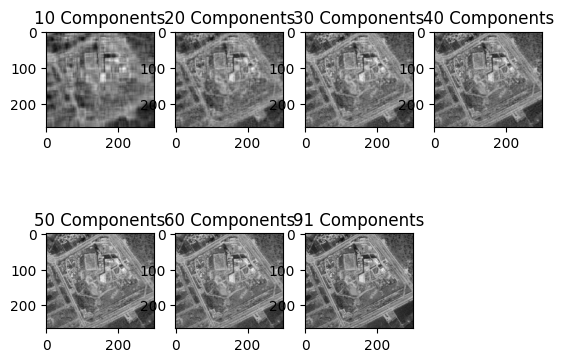

In [ ]:
for i, (img, num_comp) in enumerate(zip(output_images, num_components_list)):
    plt.subplot(2, 4, i+1)
    plt.imshow(img.astype(np.float64), cmap='gray')
    plt.title(f'{num_comp} Components')
    # plt.axis('off')

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
pca.fit(image_double)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print("Number of components explaining 95% variance: ", num_components_95)
print("Explained variance ratio with ", num_components_95 ," components: ", cumulative_variance_ratio[num_components_95-1])

Number of components explaining 95% variance:  91
Explained variance ratio with  91  components:  0.9505785631863111


# Difference between PCA and Feature Selection?

PCA is a way of finding out which features are important for best describing the variance in a data set.
PCA is an unsupervised technique, while feature selection typically (but not always) refers to supervised problems.
The difference is that PCA will try to reduce dimensionality by exploring how one feature of the data is expressed in terms of the other features. Feature selection instead, takes the target into consideration. It will rank your input variables in terms of how useful they are to predict the target value.

# Why do we standardize features before applying PCA?

PCA works under the assumption that the data is Gaussian, thus standardization is important so that large differences between range of variables could be minimized, since it's very sensitive to the variance of the variables.

# Importance of Covariance Matrix in PCA?

Covariance measures the strength of joint variability between two or more variables, indicating how much they change in relation to each other. The covariance matrix helps us visualize how strong the dependency of two features is with each other in the feature space.  Hence, they are very useful as they provide an estimate of the variance in individual random variables and also measure whether variables are correlated.

# Limitations of PCA?

It’s often difficult to interpret PCs as they are a combination of the original features. Hard to know which features contributed how much for PCs.
Some information will always be lost when we will choose a few PCs from all.
Might not work for features with non-linear relationships

# How can we figure out the importance of individual PCs in PCA?


A Scree plot can be used to visualize the importance of each principal component and can be used to determine the number of principal components to retain. This plot shows the eigenvalues in a downward curve, from highest to lowest.

Also after having the principal components, to compute the percentage of variance (information) accounted for by each component, we divide the eigenvalue of each component by the sum of eigenvalues.
